In [2]:
import pandas as pd
from pymining import seqmining

df = pd.read_csv(
    'C:/Users/User/Desktop/data mining/datawarehouse/data-mining-warehousing-wages-analysis/data/prep_survey_profile.csv',
    encoding='utf-8'
)

df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)




C:\Users\User\AppData\Local\Temp\ipykernel_2256\1637799123.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [3]:
column_mapping = {
    'What is your age (# years)?': 'Age',
    'What is your gender?': 'Gender',
    'In which country do you currently reside?': 'Country',
    'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?': 'Education',
    'Select the title most similar to your current role (or most recent title if retired)': 'Job_Title',
    'What is the size of the company where you are employed?': 'Company_Size',
    'Approximately how many individuals are responsible for data science workloads at your place of business?': 'DS_Team_Size',
    'Does your current employer incorporate machine learning methods into their business?': 'ML_Usage',
    'What is your current yearly compensation (approximate $USD)?': 'Compensation',
    'Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?': 'Cloud_Spend',
    'What is the primary tool that you use at work or school to analyze data?': 'Primary_Tool',
    'How long have you been writing code to analyze data (at work or at school)?': 'Coding_Exp',
    'What programming language would you recommend an aspiring data scientist to learn first?': 'Recommended_Lang',
    'Have you ever used a TPU (tensor processing unit)?': 'Used_TPU',
    'For how many years have you used machine learning methods?': 'ML_Exp'
}

# Rename the DataFrame columns
df = df.rename(columns=column_mapping)
df.head()


,Age,Gender,Country,Education,Job_Title,Company_Size,DS_Team_Size,ML_Usage,Compensation,Cloud_Spend,Primary_Tool,Coding_Exp,Recommended_Lang,Used_TPU,ML_Exp
0,40-44,Male,Australia,Master’s degree,Other,Enterprise,20+,I do not know,"250,000-299,999","$10,000-$99,999",Local development environments,1-2 years,Python,Used TPU,2-3 years
1,22-24,Male,India,Bachelor’s degree,Other,Small,0,No (we do not use ML methods),"4,000-4,999",$0 (USD),Local development environments,< 1 years,Python,Never,< 1 years
2,22-24,Male,India,Master’s degree,Data Scientist,Medium,20+,We are exploring ML methods (and may one day p...,"10,000-14,999",$100-$999,Local development environments,3-5 years,Python,Used TPU,2-3 years
3,22-24,Female,United States of America,Bachelor’s degree,Data Scientist,Enterprise,20+,"We recently started using ML methods (i.e., mo...","80,000-89,999",$0 (USD),Local development environments,3-5 years,Python,Used TPU,3-4 years
4,55-59,Male,Netherlands,Master’s degree,Other,Small,1-2,We are exploring ML methods (and may one day p...,$0-999,$100-$999,Local development environments,5-10 years,Python,Never,< 1 years


In [4]:
# Map Compensation to Groups
def map_compensation_range(compensation):
    if compensation in ['$0-999', '1,000-1,999', '2,000-2,999', '3,000-3,999', '4,000-4,999']:
        return 'B40'
    elif compensation in ['5,000-7,499', '7,500-9,999', '10,000-14,999', '15,000-19,999', '20,000-24,999',
                   '25,000-29,999', '30,000-39,999']:
        return 'M40'
    else:
        return 'T20'

df['Compensation_Group'] = df['Compensation'].apply(map_compensation_range)

In [6]:
sequences = df.values.tolist()

# Total number of sequences
total_sequences = len(sequences)

# Minimum support threshold
min_support =  (10/100) * total_sequences

# Find frequent sequential patterns
patterns = seqmining.freq_seq_enum(sequences, min_support)


In [ ]:
sequences = df.values.tolist()

# Total number of sequences
total_sequences = len(sequences)

# Minimum support threshold
min_support =  790

# Find frequent sequential patterns
patterns = seqmining.freq_seq_enum(sequences, min_support)

target_income = 'T20'

filtered_patterns = [
    pattern for pattern in patterns
    if len(pattern[0]) >= 4 and pattern[0][-1] == target_income
]


high_confidence_patterns = []

sorted_patterns = sorted(filtered_patterns, key=lambda x: x[1], reverse=True)

# Analyze the sequences
print(f"Frequent Patterns Leading to '{target_income}':")
for pattern, support in sorted_patterns:
    normalized_support = (support / total_sequences)

    # # Antecedent: All except the last element
    # antecedent = pattern[:-1]
    # consequent = pattern[-1]

    # # Calculate antecedent and consequent support
    # antecedent_support = sum(1 for seq in sequences if set(antecedent).issubset(seq)) / total_sequences
    # consequent_support = sum(1 for seq in sequences if consequent in seq) / total_sequences

    # # Calculate confidence and lift
    # confidence = normalized_support / antecedent_support if antecedent_support > 0 else 0
    # lift = (normalized_support / (antecedent_support * consequent_support)) if (antecedent_support * consequent_support) > 0 else 0

    # Print the results
    # print(f"Pattern: {pattern}, Support: {normalized_support:.4f}, Confidence: {confidence:.4f}, Lift: {lift:.4f}")

    if confidence > 0.3:
        high_confidence_patterns.append((pattern, normalized_support, confidence, lift))

# Print high-confidence patterns
print("\nHigh Confidence Patterns (> 0.5):")
for pattern, support, confidence, lift in high_confidence_patterns:
    print(f"Pattern: {pattern}, Support: {support:.4f}, Confidence: {confidence:.4f}, Lift: {lift:.4f}")




Frequent Patterns Leading to 'T20':

High Confidence Patterns (> 0.5):
Pattern: ('Male', 'Python', 'Never', 'T20'), Support: 0.2418, Confidence: 0.4490, Lift: 1.0061
Pattern: ('Male', 'Local development environments', 'Never', 'T20'), Support: 0.1978, Confidence: 0.4736, Lift: 1.0611
Pattern: ('Male', 'Local development environments', 'Python', 'T20'), Support: 0.1959, Confidence: 0.4568, Lift: 1.0234
Pattern: ('Local development environments', 'Python', 'Never', 'T20'), Support: 0.1748, Confidence: 0.4551, Lift: 1.0196
Pattern: ('Male', 'Master’s degree', 'Never', 'T20'), Support: 0.1590, Confidence: 0.4895, Lift: 1.0968
Pattern: ('Male', 'Local development environments', 'Python', 'Never', 'T20'), Support: 0.1553, Confidence: 0.4624, Lift: 1.0360
Pattern: ('Male', 'Master’s degree', 'Python', 'T20'), Support: 0.1551, Confidence: 0.4684, Lift: 1.0495
Pattern: ('Master’s degree', 'Python', 'Never', 'T20'), Support: 0.1382, Confidence: 0.4617, Lift: 1.0343
Pattern: ('Male', 'Data Scient

In [16]:
sequences = df.values.tolist()

# Total number of sequences
total_sequences = len(sequences)

# Minimum support threshold
min_support =  790

# Find frequent sequential patterns
patterns = seqmining.freq_seq_enum(sequences, min_support)

target_income = 'T20'

filtered_patterns = [
    pattern for pattern in patterns
    if len(pattern[0]) >= 4 and pattern[0][-1] == target_income
]

sorted_patterns = sorted(filtered_patterns, key=lambda x: x[1], reverse=True)

# Print sorted patterns
for pattern in sorted_patterns:
    sequence, support = pattern
    print(f"Sequence: {sequence}, Support: {support}")

Sequence: ('Male', 'Python', 'Never', 'T20'), Support: 1886
Sequence: ('Male', 'Local development environments', 'Never', 'T20'), Support: 1543
Sequence: ('Male', 'Local development environments', 'Python', 'T20'), Support: 1528
Sequence: ('Local development environments', 'Python', 'Never', 'T20'), Support: 1363
Sequence: ('Male', 'Master’s degree', 'Never', 'T20'), Support: 1240
Sequence: ('Male', 'Local development environments', 'Python', 'Never', 'T20'), Support: 1211
Sequence: ('Male', 'Master’s degree', 'Python', 'T20'), Support: 1210
Sequence: ('Master’s degree', 'Python', 'Never', 'T20'), Support: 1078
Sequence: ('Male', 'Data Scientist', 'Python', 'T20'), Support: 1012
Sequence: ('Male', 'Data Scientist', 'Never', 'T20'), Support: 991
Sequence: ('Male', 'Master’s degree', 'Local development environments', 'T20'), Support: 962
Sequence: ('Male', 'Master’s degree', 'Python', 'Never', 'T20'), Support: 949
Sequence: ('Male', 'Data Scientist', 'Local development environments', 'T2

In [14]:
from tabulate import tabulate

# Prepare data for the table
table_data = [(sequence, support) for sequence, support in sorted_patterns]

# Define table headers
headers = ["Sequence", "Support"]

# Print the table
print(tabulate(table_data, headers=headers, tablefmt="grid"))


+------------------------------------------------------------------------+-----------+
| Sequence                                                               |   Support |
+========================================================================+===========+
| ('Male', 'Python', 'Never', 'T20')                                     |      1886 |
+------------------------------------------------------------------------+-----------+
| ('Male', 'Local development environments', 'Never', 'T20')             |      1543 |
+------------------------------------------------------------------------+-----------+
| ('Male', 'Local development environments', 'Python', 'T20')            |      1528 |
+------------------------------------------------------------------------+-----------+
| ('Local development environments', 'Python', 'Never', 'T20')           |      1363 |
+------------------------------------------------------------------------+-----------+
| ('Male', 'Master’s degree', 'Never', 'T20

In [30]:
print(total_sequences)

7799


In [18]:
from prettytable import PrettyTable

# Initialize a PrettyTable
table = PrettyTable()
table.field_names = ["No.", "Pattern", "Support", "Confidence", "Lift"]

# Add rows to the table with numbering
for index, (pattern, support, confidence, lift) in enumerate(high_confidence_patterns, start=1):
    table.add_row([index, pattern, f"{support:.4f}", f"{confidence:.4f}", f"{lift:.4f}"])

# Print the table
print("High Confidence Patterns (> 0.3):")
print(table)


High Confidence Patterns (> 0.3):
+-----+------------------------------------------------------------------------+---------+------------+--------+
| No. |                                Pattern                                 | Support | Confidence |  Lift  |
+-----+------------------------------------------------------------------------+---------+------------+--------+
|  1  |                   ('Male', 'Python', 'Never', 'T20')                   |  0.2418 |   0.4490   | 1.0061 |
|  2  |       ('Male', 'Local development environments', 'Never', 'T20')       |  0.1978 |   0.4736   | 1.0611 |
|  3  |      ('Male', 'Local development environments', 'Python', 'T20')       |  0.1959 |   0.4568   | 1.0234 |
|  4  |      ('Local development environments', 'Python', 'Never', 'T20')      |  0.1748 |   0.4551   | 1.0196 |
|  5  |              ('Male', 'Master’s degree', 'Never', 'T20')               |  0.1590 |   0.4895   | 1.0968 |
|  6  |  ('Male', 'Local development environments', 'Python', 

In [11]:
print (total_sequences)

7799


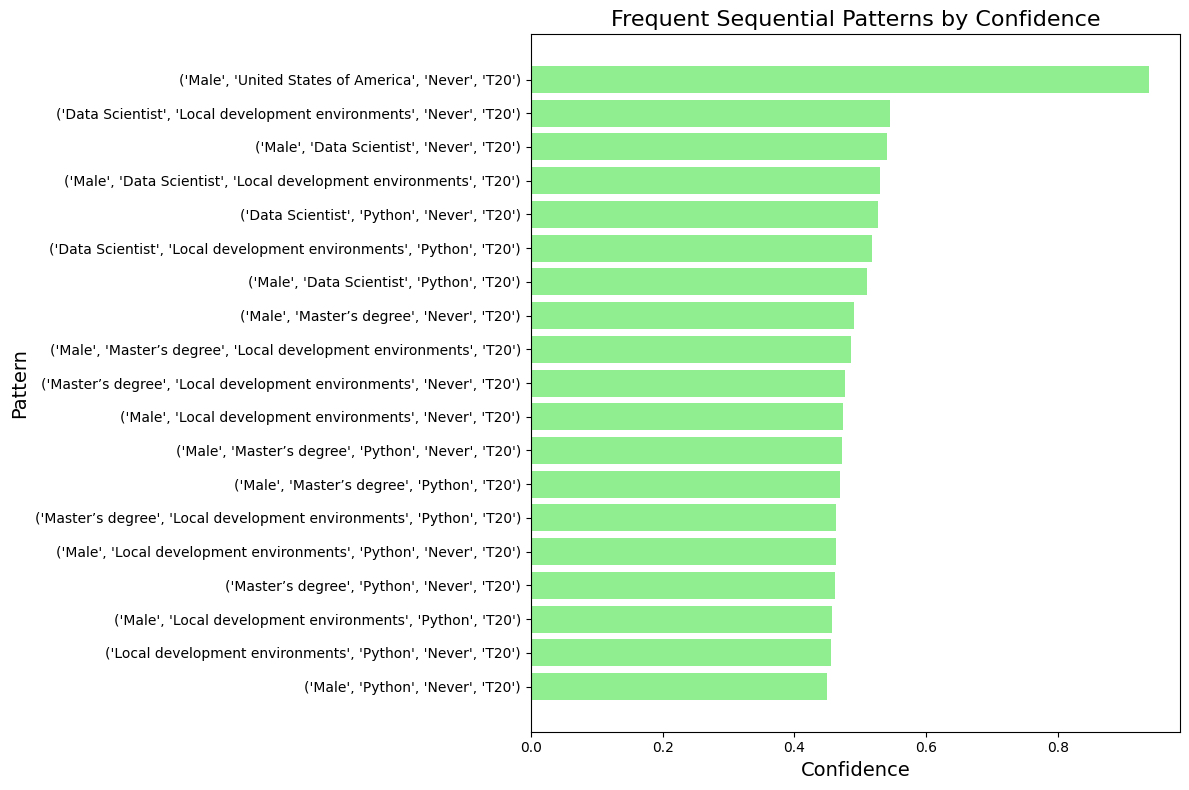

In [11]:
import matplotlib.pyplot as plt

# Sort high confidence patterns by confidence
sorted_patterns = sorted(high_confidence_patterns, key=lambda x: x[2], reverse=True)[:20]

# Extract patterns and confidence values
patterns = [str(pattern) for pattern, _, confidence, _ in sorted_patterns]
confidences = [confidence for _, _, confidence, _ in sorted_patterns]

# Create a bar plot
plt.figure(figsize=(12, 8))
plt.barh(patterns, confidences, color='lightgreen')

# Add labels and title
plt.xlabel('Confidence', fontsize=14)
plt.ylabel('Pattern', fontsize=14)
plt.title('Frequent Sequential Patterns by Confidence', fontsize=16)
plt.gca().invert_yaxis()  # Highest confidence on top
plt.tight_layout()

# Show the plot
plt.show()
